### Import Packages

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats

In [9]:
set_matplotlib_formats('svg')

In [2]:
plt.style.use('ggplot')

### Load Data

In [3]:
df = pd.read_csv('UNC Charlotte Reddit Posts.csv', index_col = False)

### Column Transformation

In [4]:
df.index = pd.to_datetime(df['created_time_converted'])

In [5]:
# Drop Extra Columns
df.drop(columns = ['Unnamed: 0', 'created_utc', 'created', 'Submission ID', 'created_time_converted'], inplace = True)

In [6]:
df.dtypes

author                object
id                    object
selftext              object
subreddit             object
title                 object
url                   object
Score                  int64
Number of Comments     int64
dtype: object

### Plotting Comment Activity

In [7]:
monthly_sum = df.groupby(pd.Grouper(freq='M')).sum()
yearly_sum = df.groupby(pd.Grouper(freq='Y')).sum()

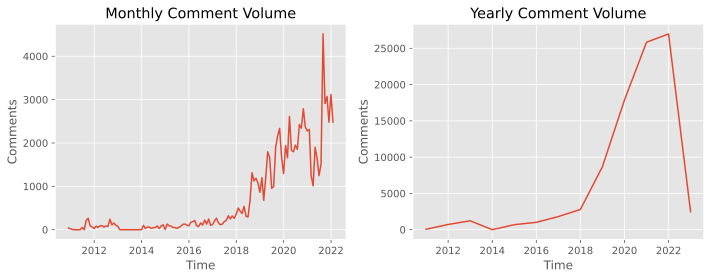

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

ax1.plot(monthly_sum.index, monthly_sum['Number of Comments'])
ax1.set(title='Monthly Comment Volume', xlabel='Time', 
       ylabel='Comments');

ax2.plot(yearly_sum.index, yearly_sum['Number of Comments'])
ax2.set(title='Yearly Comment Volume', xlabel='Time', 
       ylabel='Comments');

plt.tight_layout()
#plt.savefig('Monthly and Yearly Comment Volume')

### Plotting Post Karma

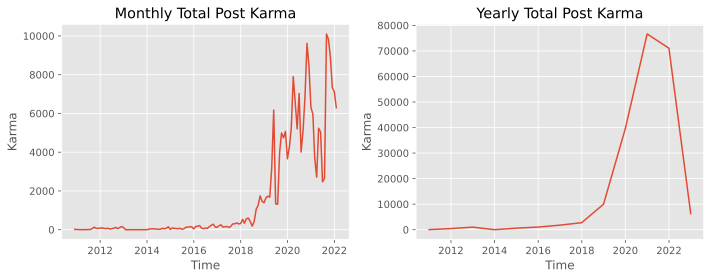

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

ax1.plot(monthly_sum.index, monthly_sum['Score'])
ax1.set(title='Monthly Total Post Karma', xlabel='Time', 
       ylabel='Karma');

ax2.plot(yearly_sum.index, yearly_sum['Score'])
ax2.set(title='Yearly Total Post Karma', xlabel='Time', 
       ylabel='Karma');

plt.tight_layout()
# plt.savefig('Monthly and Yearly Post Karma')

### Plotting Post Volume

In [12]:
monthly_count = df.groupby(pd.Grouper(freq='M')).count()[['author']].rename(columns = {'author':'Posts'})

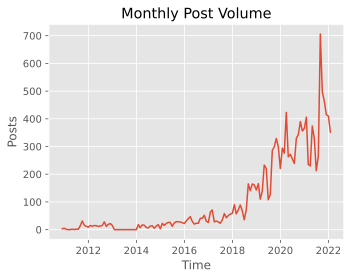

In [13]:
fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (5,4))

ax1.plot(monthly_count.index, monthly_count['Posts'])
ax1.set(title='Monthly Post Volume', xlabel='Time', 
       ylabel='Posts');

plt.tight_layout()
#plt.savefig('Monthly Post Volume')

I'm interested in what spawned the growth of the Reddit activity in mid 2018.

In [14]:
df['year'] = df.index.year
df['month'] = df.index.month

Now that we've added date columns - let's zoom into 2018 in particular.

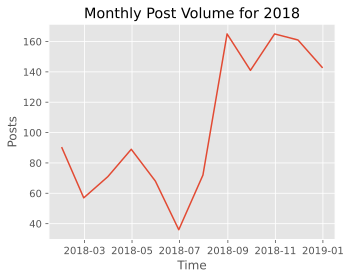

In [15]:
fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (5,4))

ax1.plot(monthly_count.index[monthly_count.index.year == 2018], monthly_count[monthly_count.index.year == 2018]['Posts'])
ax1.set(title='Monthly Post Volume for 2018', xlabel='Time', 
       ylabel='Posts');

plt.tight_layout()
#plt.savefig('Monthly Post Volume for 2018')

In [16]:
explosive_growth_2018 = df[(df['month'] >= 8) & (df['month'] <= 10) & (df['year'] == 2018)]

In [17]:
explosive_growth_2018[['title', 'selftext', 'Score']].sort_values(by = ['Score'], ascending = False)

,title,selftext,Score
created_time_converted,,,
2018-10-31 17:19:59,This is accurate,NaN,146
2018-08-01 11:28:20,Went to the 4th Floor of COED for the first ti...,NaN,86
2018-10-25 08:23:18,It looks like someone pulled the old “Soap in ...,NaN,85
2018-08-25 21:00:36,welcome back 49ers!,NaN,80
2018-09-24 21:30:01,You hate to see it (Haven 49),NaN,78
...,...,...,...
2018-08-21 16:53:48,Will i get into unc charlotte?,This has always been my top choice and I hope ...,0
2018-10-02 21:22:52,East Deck Parking,What are the best times to find parking in eas...,0
2018-10-04 12:11:08,Note Takers,I signed up to be a note taker for one of my c...,0


In [44]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [45]:
word_list = " ".join(title for title in explosive_growth_2018.title.astype(str))

In [46]:
stop_list = set(STOPWORDS)

In [47]:
stop_list.update(["UNCC", "UNC", "Charlotte", "campus", "anyone", "student"]) # add super-common words that aren't usual stopwords.

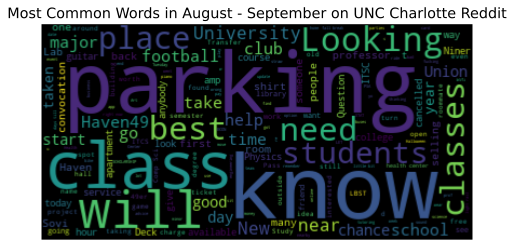

In [48]:
plot = WordCloud(stopwords = stop_list).generate(word_list)
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(plot, interpolation='bilinear')
plt.title('Most Common Words in August - September on UNC Charlotte Reddit')
plt.show()